# Week 3 Homework

Utilize the scikit-learn California Housing dataset for the following exercise  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
## 1. Download the dataset and build DataFrames for X and y

In [3]:
cal_housing = fetch_california_housing()

In [4]:
X_df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y_df = pd.DataFrame(cal_housing.target)

In [6]:
print(pd.isnull(X_df).any())

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool


In [7]:
print(pd.isnull(y_df).any())

0    False
dtype: bool


## 2. Are there columns that look like they need a type change?

In [9]:
X_df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [10]:
y_df.dtypes

0    float64
dtype: object

None of the columns are of 'Object' type so they don't need a type change

# 3. Split your data into training and testing datasets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.4, random_state=4)

## 4. Build a K-NN Regressor and fit it

In [6]:
h_reg = KNeighborsRegressor(n_neighbors=8)
h_reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

## 5. Try several different parameter values, especially for number of neighbors.  Keep the optimal result that you encounter while testing.

In [7]:
y_pred = h_reg.predict(x_test)

In [8]:
print("Training set Accuracy: {:.2f}".format(h_reg.score(x_train, y_train)))
print("Testing set Accuracy: {:.2f}".format(h_reg.score(x_test, y_test)))

Training set Accuracy: 0.34
Testing set Accuracy: 0.13


In [9]:
h_reg = KNeighborsRegressor(n_neighbors=8,algorithm='kd_tree',leaf_size=10,p=1)
h_reg.fit(x_train,y_train)
y_pred = h_reg.predict(x_test)
print("Accuracy: {:.2f}".format(h_reg.score(x_test, y_test)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Accuracy: 0.22
Mean Absolute Error: 0.78


In [10]:
h_reg = KNeighborsRegressor(n_neighbors=9,algorithm='kd_tree',leaf_size=35,p=1,weights='distance')
h_reg.fit(x_train,y_train)
y_pred = h_reg.predict(x_test)
print("Accuracy: {:.2f}".format(h_reg.score(x_test, y_test)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Accuracy: 0.25
Mean Absolute Error: 0.77


## 6. Determing model accuracy or efficacy is slightly harder with a regression.  What is your mean absolute error from the model?

In [11]:
mean_absolute_error(y_test, y_pred)

0.7660139148313955

## 7. Chart your predictions vs the actuals.

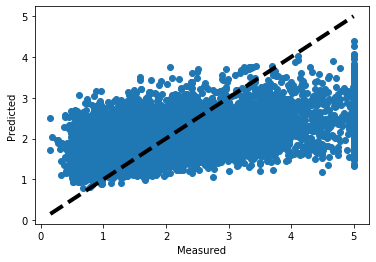

In [13]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()